# Feature choosing

In [51]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn import svm
from xgboost import XGBRegressor,plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,log_loss
import matplotlib.pyplot as plt

In [52]:
train = pd.read_csv('train_cleaning.csv')
label = pd.read_csv('label.csv')
test = pd.read_csv('test_cleaning.csv')

In [53]:
train_str = train.select_dtypes(include=['object'])
train_int = train.select_dtypes(exclude=['object'])
test_str  = test.select_dtypes (include =['object'])
test_int  = test.select_dtypes (exclude =['object'])

In [54]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [55]:
for i in range(train_str.shape[1]):
    le.fit(train_str.iloc[:,i])
    train_str.iloc[:,i] = le.transform(train_str.iloc[:,i])

/home/yasser/anaconda3/envs/AMMI/lib/python3.6/site-packages/pandas/core/indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/home/yasser/anaconda3/envs/AMMI/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [56]:
train = pd.concat([train_int,train_str],axis=1)
label = pd.read_csv('label.csv')

In [57]:
for i in range(test_str.shape[1]):
    le.fit(test_str.iloc[:,i])
    test_str.iloc[:,i] = le.transform(test_str.iloc[:,i])

In [58]:
test = pd.concat([test_int,test_str],axis=1)

In [59]:
train.to_csv('train_set.csv',index=False)
test.to_csv('test_set.csv',index=False)

In [60]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn import svm
from xgboost import XGBRegressor,plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,log_loss
import matplotlib.pyplot as plt

In [61]:
train = pd.read_csv('train_set.csv')
label = pd.read_csv('label.csv')
test = pd.read_csv('test_set.csv')

## 1. Using Lasso to degenerate the parameters

In [62]:
sgd_l1 = SGDRegressor(max_iter=30, penalty="l1", random_state=1,alpha=1e-2)
sgd_l1.fit(train, label)

/home/yasser/anaconda3/envs/AMMI/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.01, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=30,
       n_iter=None, n_iter_no_change=5, penalty='l1', power_t=0.25,
       random_state=1, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [63]:
sgd_l1.coef_

array([-2.38958372e+12, -7.07121178e+11,  2.24123046e+12, -3.35569456e+11,
       -2.98948750e+12,  3.95897114e+12, -1.04892248e+11,  5.08711279e+10,
        3.57013869e+09, -1.26406905e+13, -2.69088617e+10,  9.35901861e+09,
        8.83187614e+11, -1.64438709e+10,  1.80744495e+12, -5.48634300e+12,
        9.89167825e+10, -4.13645187e+12,  1.60392372e+10, -6.86817759e+12,
       -1.08946600e+12, -2.38963811e+12,  9.84856819e+12,  3.57718683e+12,
        8.45454187e+12,  8.22867776e+11,  3.55866962e+11, -1.92675184e+11,
       -1.03306776e+11,  6.46790277e+12,  2.90427232e+12, -2.15741946e+11,
        9.73053776e+11, -5.76687853e+12,  5.43498129e+12,  8.60496302e+11,
       -2.53488871e+12,  8.23847840e+08,  4.00946157e+11, -6.04222488e+09,
       -4.50271172e+11,  3.44231995e+10, -1.28447223e+11, -3.58863960e+11,
        7.84179479e+08, -2.19032554e+11, -4.64203093e+10, -6.75779253e+09,
       -7.63990648e+10, -4.52158315e+10, -6.12654282e+11, -5.78264964e+11,
       -2.55299965e+11,  

In [64]:
sgd_l1.coef_.min(), sgd_l1.coef_.max()

(-12640690522978.441, 9848568189329.725)

In [65]:
good_feats = np.abs(np.array(sgd_l1.coef_)) > 1e+12 # lower bound alpha=1e-6

print("Features reduced from %10d to %10d" % (train.shape[1], int(good_feats.sum())))

Features reduced from         80 to         20


In [66]:
train_l1_select = train.loc[:, good_feats]
test_l1_select = test.loc[:, good_feats]

## 2. Using XGBooster to plot importance

In [67]:
model = XGBRegressor(max_depth=5,n_estimators=1000,learning_rate=1e-2)
model.fit(train,label)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [68]:
print(model.feature_importances_)

[8.0268569e-02 2.9759584e-02 1.2562270e-03 1.1262725e-02 4.9685944e-02
 7.1908166e-03 8.1004985e-03 2.3391813e-03 3.3008449e-02 1.2518952e-02
 9.3567250e-03 6.4544077e-03 5.0638944e-02 8.1438161e-03 2.5514403e-02
 7.0305392e-02 1.6894087e-03 2.8200129e-02 1.6027724e-03 5.8782760e-02
 2.2525450e-02 2.5990903e-03 3.5087720e-03 1.8106995e-02 3.8986356e-04
 2.2742040e-02 2.4041586e-02 3.4611218e-02 2.8503357e-02 5.3714532e-03
 1.1392679e-02 5.5447258e-03 3.9376218e-02 2.0489495e-02 2.6294131e-02
 2.5037903e-02 1.1176089e-02 5.1981804e-04 4.3318170e-05 2.1225903e-03
 1.0353043e-02 6.2811351e-03 1.0829543e-03 7.9272259e-03 3.6820446e-03
 1.1435998e-02 2.5124541e-03 1.7327268e-04 8.6636347e-04 5.3714532e-03
 1.4294997e-02 4.1152262e-03 3.1189085e-03 5.1115444e-03 2.3824994e-03
 1.0916179e-02 5.1981804e-04 2.4258175e-03 2.2525450e-03 5.7613170e-03
 0.0000000e+00 2.3391813e-03 6.0645440e-03 7.5373617e-03 3.1189085e-03
 6.0645438e-04 3.8986355e-03 5.9779077e-03 1.4078406e-02 5.0682263e-03
 0.000

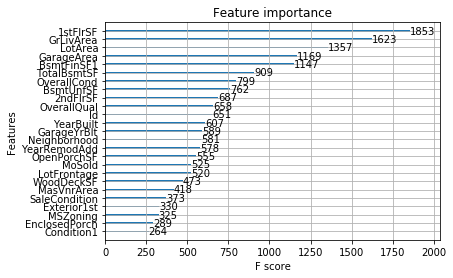

In [69]:
plot_importance(model,max_num_features=25)
plt.show()

In [70]:
good_feats_xgb = np.abs(np.array(model.feature_importances_)) > 1e-2
print("Features reduced from %10d to %10d" % (train.shape[1], int(good_feats_xgb.sum())))

Features reduced from         80 to         30


In [71]:
train_xgb_select = train.loc[:, good_feats_xgb]
test_xgb_select = test.loc[:, good_feats_xgb]

# Model training

### 1.lasso selection

In [72]:
x_train,x_val,y_train,y_val = train_test_split(train_l1_select,label,test_size = 0.3,random_state = 2)

In [73]:
model = XGBRegressor(max_depth=5,learning_rate=1e-2,n_estimators=1000)
model.fit(x_train,y_train,\
          eval_metric='rmse',\
          eval_set=[(x_val,y_val)],\
          early_stopping_rounds=200,\
          verbose=1)

[0]	validation_0-rmse:198738
Will train until validation_0-rmse hasn't improved in 200 rounds.
[1]	validation_0-rmse:196840
[2]	validation_0-rmse:194965
[3]	validation_0-rmse:193106
[4]	validation_0-rmse:191269
[5]	validation_0-rmse:189455
[6]	validation_0-rmse:187652
[7]	validation_0-rmse:185871
[8]	validation_0-rmse:184098
[9]	validation_0-rmse:182351
[10]	validation_0-rmse:180626
[11]	validation_0-rmse:178913
[12]	validation_0-rmse:177214
[13]	validation_0-rmse:175546
[14]	validation_0-rmse:173876
[15]	validation_0-rmse:172246
[16]	validation_0-rmse:170612
[17]	validation_0-rmse:169003
[18]	validation_0-rmse:167422
[19]	validation_0-rmse:165839
[20]	validation_0-rmse:164283
[21]	validation_0-rmse:162746
[22]	validation_0-rmse:161242
[23]	validation_0-rmse:159732
[24]	validation_0-rmse:158277
[25]	validation_0-rmse:156826
[26]	validation_0-rmse:155370
[27]	validation_0-rmse:153931
[28]	validation_0-rmse:152535
[29]	validation_0-rmse:151148
[30]	validation_0-rmse:149777
[31]	validatio

[261]	validation_0-rmse:45391.3
[262]	validation_0-rmse:45366.3
[263]	validation_0-rmse:45313.5
[264]	validation_0-rmse:45291.4
[265]	validation_0-rmse:45269.5
[266]	validation_0-rmse:45218.7
[267]	validation_0-rmse:45199.1
[268]	validation_0-rmse:45151.9
[269]	validation_0-rmse:45127.9
[270]	validation_0-rmse:45103.9
[271]	validation_0-rmse:45061.1
[272]	validation_0-rmse:45051.2
[273]	validation_0-rmse:45034.6
[274]	validation_0-rmse:45020.6
[275]	validation_0-rmse:45014.7
[276]	validation_0-rmse:44976.9
[277]	validation_0-rmse:44959
[278]	validation_0-rmse:44951.3
[279]	validation_0-rmse:44948.6
[280]	validation_0-rmse:44937.8
[281]	validation_0-rmse:44936.1
[282]	validation_0-rmse:44926.9
[283]	validation_0-rmse:44922.4
[284]	validation_0-rmse:44922.7
[285]	validation_0-rmse:44910
[286]	validation_0-rmse:44907.3
[287]	validation_0-rmse:44901.4
[288]	validation_0-rmse:44903.9
[289]	validation_0-rmse:44899.2
[290]	validation_0-rmse:44902.6
[291]	validation_0-rmse:44897.7
[292]	valida

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [75]:
pred = model.predict(test_l1_select)
submission = pd.read_csv('sample_submission.csv')
submission.SalePrice = pred
submission.to_csv('submission_l1_select.csv',index=False)

### 2. xgb selection

In [76]:
x_train,x_val,y_train,y_val = train_test_split(train_xgb_select,label,test_size = 0.3,random_state = 3)

In [77]:
model = XGBRegressor(max_depth=5,learning_rate=1e-2,n_estimators=1000)
model.fit(x_train,y_train,\
          eval_metric='rmse',\
          eval_set=[(x_val,y_val)],\
          early_stopping_rounds=200,\
          verbose=2)

[0]	validation_0-rmse:191543
Will train until validation_0-rmse hasn't improved in 200 rounds.
[2]	validation_0-rmse:187900
[4]	validation_0-rmse:184328
[6]	validation_0-rmse:180811
[8]	validation_0-rmse:177393
[10]	validation_0-rmse:174023
[12]	validation_0-rmse:170737
[14]	validation_0-rmse:167499
[16]	validation_0-rmse:164319
[18]	validation_0-rmse:161213
[20]	validation_0-rmse:158157
[22]	validation_0-rmse:155193
[24]	validation_0-rmse:152251
[26]	validation_0-rmse:149424
[28]	validation_0-rmse:146627
[30]	validation_0-rmse:143917
[32]	validation_0-rmse:141255
[34]	validation_0-rmse:138625
[36]	validation_0-rmse:136068
[38]	validation_0-rmse:133564
[40]	validation_0-rmse:131097
[42]	validation_0-rmse:128672
[44]	validation_0-rmse:126307
[46]	validation_0-rmse:123947
[48]	validation_0-rmse:121683
[50]	validation_0-rmse:119465
[52]	validation_0-rmse:117334
[54]	validation_0-rmse:115220
[56]	validation_0-rmse:113176
[58]	validation_0-rmse:111170
[60]	validation_0-rmse:109178
[62]	vali

[518]	validation_0-rmse:23856.7
[520]	validation_0-rmse:23851.1
[522]	validation_0-rmse:23847.3
[524]	validation_0-rmse:23839.6
[526]	validation_0-rmse:23830.1
[528]	validation_0-rmse:23824.3
[530]	validation_0-rmse:23817.2
[532]	validation_0-rmse:23815.4
[534]	validation_0-rmse:23809.8
[536]	validation_0-rmse:23808.4
[538]	validation_0-rmse:23801.3
[540]	validation_0-rmse:23798.8
[542]	validation_0-rmse:23795.2
[544]	validation_0-rmse:23792
[546]	validation_0-rmse:23787.7
[548]	validation_0-rmse:23780.9
[550]	validation_0-rmse:23777.2
[552]	validation_0-rmse:23776.2
[554]	validation_0-rmse:23770
[556]	validation_0-rmse:23771
[558]	validation_0-rmse:23760.6
[560]	validation_0-rmse:23758.7
[562]	validation_0-rmse:23760.1
[564]	validation_0-rmse:23754.8
[566]	validation_0-rmse:23749.4
[568]	validation_0-rmse:23747.8
[570]	validation_0-rmse:23743.6
[572]	validation_0-rmse:23744.6
[574]	validation_0-rmse:23733.1
[576]	validation_0-rmse:23728.5
[578]	validation_0-rmse:23722.1
[580]	validati

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [78]:
pred = model.predict(test_xgb_select)
submission = pd.read_csv('sample_submission.csv')
submission.SalePrice = pred
submission.to_csv('submission_xgb_select.csv',index=False)

### Ensemble

In [80]:
pred1 = pd.read_csv('submission_xgb_select.csv')
pred2 = pd.read_csv('submission_l1_select.csv')

In [81]:
pred = 0.7*pred1.SalePrice.values + 0.3*pred2.SalePrice.values

In [82]:
submission = pd.read_csv('sample_submission.csv')
submission.SalePrice = pred
submission.to_csv('submission_ensemble.csv',index=False)